## Triangle Wrapping

### Wrap Triangle Code 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [28]:
# Warps and alpha blends triangular regions from img1 and img2 to img
def warpTriangle(img1, img2, tri1, tri2) :
    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(tri1)
    r2 = cv2.boundingRect(tri2)

    print(r1)
    print(r2)

    # Crop input image
    img1Cropped = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    
    # Once the bounding boxes are cropped, 
    # the triangle coordinates need to be 
    # adjusted by an offset to reflect the 
    # fact that they are now in a cropped image. 
    # Offset points by left top corner of the respective rectangles
    tri1Cropped = []
    tri2Cropped = []

    triIn = np.float32([[[360,50], [60,100], [300,400]]])
    triOut = np.float32([[[400,200], [160,270], [400,400]]])

    # (60, 50, 301, 351)
    # (160, 200, 241, 201)

    # (360.0, 50.0) 
    # (60, 50)
    # - (300,0)
    # (400.0, 200.0)
    # (160, 200)
    # - (240,0)

    # (60.0, 100.0)
    # (60, 50)
    # - (0,50)
    
    # (160.0, 270.0)
    # (160, 200)
    # - (0,70)

    # (300.0, 400.0)
    # (60, 50)
    # - (240,350)

    # (400.0, 400.0)
    # (160, 200)
    # - (240,200)

    for i in range(0, 3):
        print((tri1[0][i][0]-r1[0]),(tri1[0][i][1]-r1[1])))
        print(((tri2[0][i][0]-r2[0]),(tri2[0][i][1]-r2[1])))
        
        tri1Cropped.append(((tri1[0][i][0]-r1[0]),(tri1[0][i][1]-r1[1])))
        tri2Cropped.append(((tri2[0][i][0]-r2[0]),(tri2[0][i][1]-r2[1])))

    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(tri1Cropped),
                                      np.float32(tri2Cropped) )

    # Apply the Affine Transform just found to the src image
    img2Cropped = cv2.warpAffine( img1Cropped, warpMat, 
                              (r2[2], r2[3]), 
                              None, 
                              flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_REFLECT_101 )
    
    # We are interested in the pixels inside 
    # the triangle and not the entire bounding box. 

    # So we create a triangular mask using fillConvexPoly.
    # This mask has values 1 ( in all three channels ) 
    # inside the triangle and 0 outside. 
    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tri2Cropped), 
                      (1.0, 1.0, 1.0), 16, 0);
    
    # The triangle is alpha blended into the output 
    # image using the mask.
    img2Cropped = img2Cropped * mask
    
    # Copy triangular region of the rectangular patch to the output image
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = \
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]]*((1.0, 1.0, 1.0)-mask)

    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = \
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]]+img2Cropped

In [11]:
imgIn = cv2.imread(DATA_PATH + "images/kingfisher.jpg")
imgOut = 255 * np.ones(imgIn.shape, dtype = imgIn.dtype)

In [12]:
triIn = np.float32([[[360,50], [60,100], [300,400]]])
triOut = np.float32([[[400,200], [160,270], [400,400]]])

In [29]:
warpTriangle(imgIn, imgOut, triIn, triOut)

(60, 50, 301, 351)
(160, 200, 241, 201)
(360.0, 50.0)
(60, 50)
(400.0, 200.0)
(160, 200)
(60.0, 100.0)
(60, 50)
(160.0, 270.0)
(160, 200)
(300.0, 400.0)
(60, 50)
(400.0, 400.0)
(160, 200)


In [14]:
# Draw triangle using this color
color = (255, 150, 0)

# Draw triangles in input and output images.
cv2.polylines(imgIn, triIn.astype(int), True, color, 2, cv2.LINE_AA);
cv2.polylines(imgOut, triOut.astype(int), True, color, 2, cv2.LINE_AA);

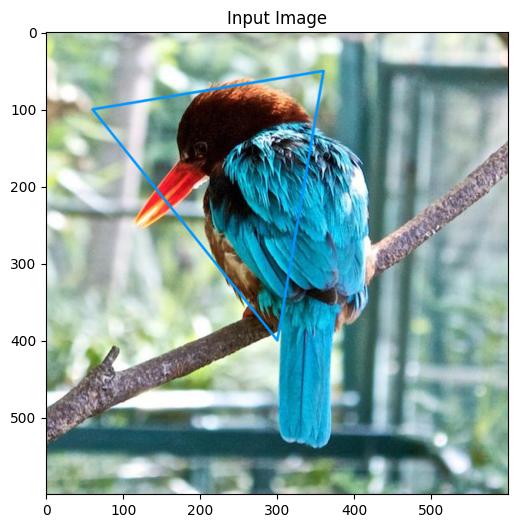

In [15]:
plt.imshow(imgIn[:,:,::-1])
plt.title("Input Image")
plt.show()

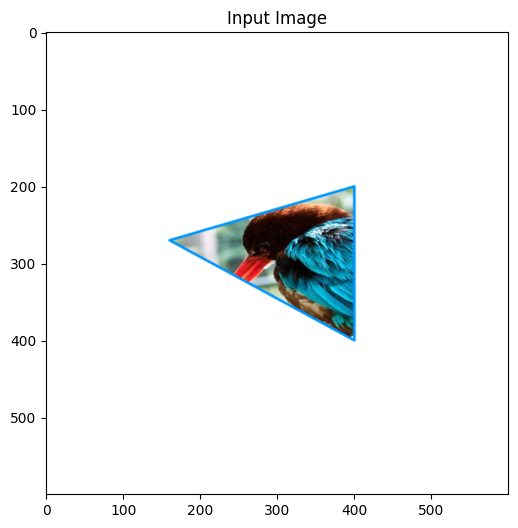

In [16]:
plt.imshow(imgOut[:,:,::-1])
plt.title("Input Image")
plt.show()